In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error, r2_score,mean_squared_error, confusion_matrix,adjusted_rand_score, silhouette_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
##### conveting CSV to dataframe #####

data = pd.read_csv('data.csv')

In [4]:

######## Linear Regression #########


# Features (predictors) and target variable
X = data.drop(columns=['PatientID', 'MMSE', 'DoctorInCharge', 'Gender', 'Ethnicity', 'EducationLevel', 'Diagnosis'])
y = data['MMSE']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [5]:
# Evaluate the model for Linear Regression

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on test set: {mse:.2f}")
print(f"R-squared on test set: {r2:.2f}")


Mean Squared Error on test set: 73.70
R-squared on test set: -0.02


In [6]:
# Apply k-fold cross-validation for linear regression

k = 10  # Number of folds
cross_val_scores = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')

print(f"Cross-validation mean squared error scores: {-cross_val_scores}")
print(f"Mean cross-validation mean squared error: {-cross_val_scores.mean():.2f}")
print(f"Standard deviation of cross-validation mean squared error: {cross_val_scores.std():.2f}")

Cross-validation mean squared error scores: [68.78455218 77.78882984 66.42301189 82.29766447 73.00076073 75.62464833
 78.94463733 74.04969386 79.25564849 81.83781095]
Mean cross-validation mean squared error: 75.80
Standard deviation of cross-validation mean squared error: 5.03


In [7]:


######## Logistic Regression #########


data = pd.read_csv('data.csv')


X = data.drop(columns=['PatientID', 'Diagnosis', 'DoctorInCharge', 'Gender' ,'Ethnicity','EducationLevel'])  # Features (predictors)
y = data['Diagnosis']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=3000, solver='newton-cg')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



In [8]:
# Evaluate the model for logistic regression

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy on test set: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy on test set: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.78      0.73      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.81       430
weighted avg       0.83      0.83      0.83       430



In [9]:
# k-fold test for logistic regression

k = 10  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=skf)

print(f"Cross-validation accuracy scores: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {cross_val_scores.mean():.2f}")
print(f"Standard deviation of cross-validation accuracy: {cross_val_scores.std():.2f}")

Cross-validation accuracy scores: [0.81860465 0.88372093 0.87906977 0.85581395 0.83255814 0.8372093
 0.80465116 0.83255814 0.82325581 0.8317757 ]
Mean cross-validation accuracy: 0.84
Standard deviation of cross-validation accuracy: 0.02


In [10]:
# analyze performance metrics

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on test set: {mse:.2f}")
print(f"Root Mean Squared Error on test set: {rmse:.2f}")
print(f"Mean Absolute Error on test set: {mae:.2f}")
print(f"R-squared on test set: {r2:.2f}")

Mean Squared Error on test set: 0.17
Root Mean Squared Error on test set: 0.41
Mean Absolute Error on test set: 0.17
R-squared on test set: 0.26


c:\Users\devan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
# predicting alzimer based on new data person 1

new_person = {
    'Age': 75,
    'BMI': 17.857902787323138,
    'Smoking': 0,
    'AlcoholConsumption': 18.767260655227215,
    'PhysicalActivity': 1.3606670291415413,
    'DietQuality': 2.904661636047192,
    'SleepQuality': 8.555256019650281,
    'FamilyHistoryAlzheimers': 0,
    'CardiovascularDisease': 0,
    'Diabetes': 0,
    'Depression': 0,
    'HeadInjury': 0,
    'Hypertension': 0,
    'SystolicBP': 152,
    'DiastolicBP': 106,
    'CholesterolTotal': 186.384436151611,
    'CholesterolLDL': 95.41070035813202,
    'CholesterolHDL': 93.6497354072566,
    'CholesterolTriglycerides': 367.9868766873898,
    'MMSE': 6.458060312181194,
    'FunctionalAssessment': 8.687479533704925,
    'MemoryComplaints': 0,
    'BehavioralProblems': 1,
    'ADL': 9.20495234789384,
    'Confusion': 0,
    'Disorientation': 0,
    'PersonalityChanges': 0,
    'DifficultyCompletingTasks': 0,
    'Forgetfulness': 0,
}

# Convert input features to a DataFrame
new_data = pd.DataFrame([new_person])

# Make predictions for the new person
prediction = model.predict(new_data)
probability = model.predict_proba(new_data)[:, 1]  # Probability of having Alzheimer's

if prediction[0] == 1:
    print("Likelihood of Alzheimer's: High")
else:
    print("Likelihood of Alzheimer's: Low")

print(f"Probability: {probability[0]:.2f}")

Likelihood of Alzheimer's: Low
Probability: 0.12


In [12]:
# predicting alzimer based on new data person 2

new_person= {
    'Age': 81,
    'BMI': 22.630944676651062,
    'Smoking': 1,
    'AlcoholConsumption': 2.328341104617011,
    'PhysicalActivity': 0.33460526089975406,
    'DietQuality': 4.103678479250944,
    'SleepQuality': 7.85822733016993,
    'FamilyHistoryAlzheimers': 1,
    'CardiovascularDisease': 1,
    'Diabetes': 0,
    'Depression': 0,
    'HeadInjury': 0,
    'Hypertension': 0,
    'SystolicBP': 140,
    'DiastolicBP': 85,
    'CholesterolTotal': 186.44868713392043,
    'CholesterolLDL': 63.322617429162094,
    'CholesterolHDL': 29.61277476986841,
    'CholesterolTriglycerides': 310.5935918588748,
    'MMSE': 10.535127455429516,
    'FunctionalAssessment': 4.877707159773347,
    'MemoryComplaints': 0,
    'BehavioralProblems': 0,
    'ADL': 0.05537868829632919,
    'Confusion': 1,
    'Disorientation': 0,
    'PersonalityChanges': 0,
    'DifficultyCompletingTasks': 1,
    'Forgetfulness': 1,
}

# Convert input features to a DataFrame
new_data = pd.DataFrame([new_person])

# Make predictions for the new person
prediction = model.predict(new_data)
probability = model.predict_proba(new_data)[:, 1]  # Probability of having Alzheimer's

if prediction[0] == 1:
    print("Likelihood of Alzheimer's: High")
else:
    print("Likelihood of Alzheimer's: Low")

print(f"Probability: {probability[0]:.2f}")

Likelihood of Alzheimer's: High
Probability: 0.58


Accuracy on test set: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.78      0.72      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430

Confusion Matrix:
 [[246  31]
 [ 43 110]]
Cross-validation accuracy scores: [0.77209302 0.8372093  0.79069767 0.82790698 0.81395349 0.82790698
 0.8372093  0.84651163 0.85581395 0.62616822]
Mean cross-validation accuracy: 0.80
Standard deviation of cross-validation accuracy: 0.06


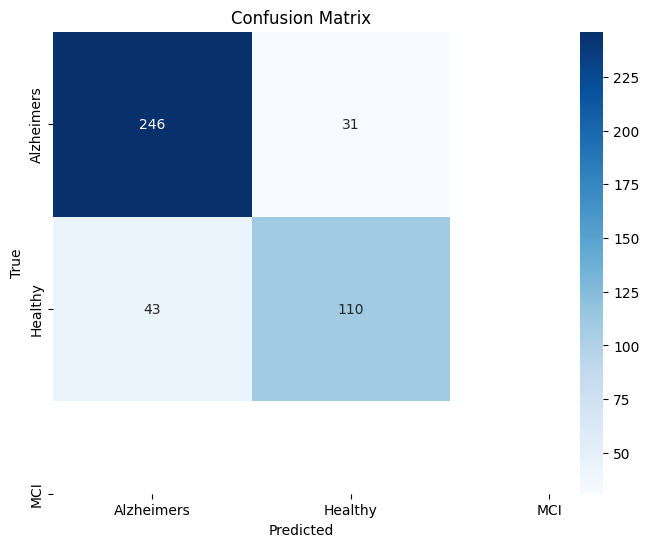

In [13]:
data = data.drop(columns=['PatientID', 'Gender', 'Ethnicity', 'EducationLevel', 'DoctorInCharge'])

# Encode categorical target variable
data['Diagnosis'] = data['Diagnosis'].astype('category').cat.codes

# Separate features and target variable
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Feature selection
selector = SelectKBest(mutual_info_classif, k=10)
X_new = selector.fit_transform(X, y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Apply k-fold cross-validation
k = 10  # Number of folds
cross_val_scores = cross_val_score(model, X_new, y, cv=k)

print(f"Accuracy on test set: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print(f"Cross-validation accuracy scores: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {cross_val_scores.mean():.2f}")
print(f"Standard deviation of cross-validation accuracy: {cross_val_scores.std():.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Alzheimers', 'Healthy', 'MCI'], yticklabels=['Alzheimers', 'Healthy', 'MCI'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy on test set: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.79      0.73      0.76       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.81       430
weighted avg       0.83      0.83      0.83       430

Confusion Matrix:
 [[247  30]
 [ 42 111]]
Cross-validation accuracy scores: [0.8744186  0.88837209 0.84651163 0.86046512 0.8372093  0.86976744
 0.88837209 0.8744186  0.85116279 0.64018692]
Mean cross-validation accuracy: 0.84
Standard deviation of cross-validation accuracy: 0.07


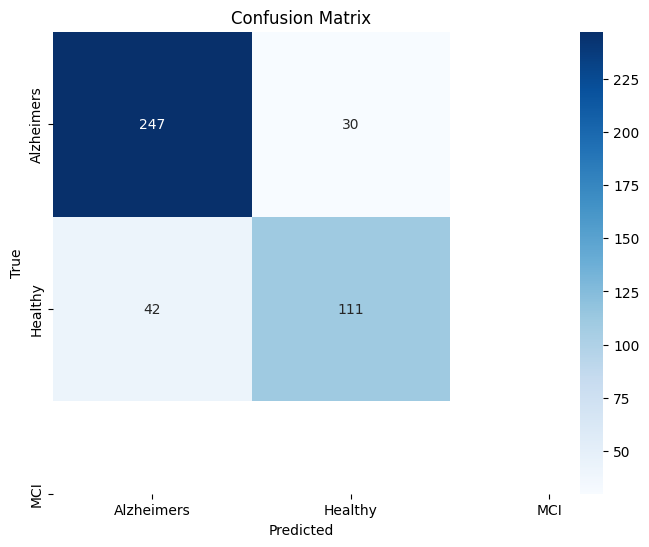

In [14]:
# Encode categorical target variable
data['Diagnosis'] = data['Diagnosis'].astype('category').cat.codes

# Separate features and target variable
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Feature selection
selector = SelectKBest(mutual_info_classif, k=10)
X_new = selector.fit_transform(X, y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Create and train the SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Apply k-fold cross-validation
k = 10  # Number of folds
cross_val_scores = cross_val_score(model, X_new, y, cv=k)

print(f"Accuracy on test set: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print(f"Cross-validation accuracy scores: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {cross_val_scores.mean():.2f}")
print(f"Standard deviation of cross-validation accuracy: {cross_val_scores.std():.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Alzheimers', 'Healthy', 'MCI'], yticklabels=['Alzheimers', 'Healthy', 'MCI'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy on test set: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       277
           1       0.70      0.59      0.64       153

    accuracy                           0.76       430
   macro avg       0.74      0.72      0.73       430
weighted avg       0.76      0.76      0.76       430

Confusion Matrix:
 [[238  39]
 [ 63  90]]
Cross-validation accuracy scores: [0.73023256 0.81395349 0.71627907 0.78139535 0.7255814  0.74883721
 0.78604651 0.75813953 0.70697674 0.57009346]
Mean cross-validation accuracy: 0.73
Standard deviation of cross-validation accuracy: 0.06


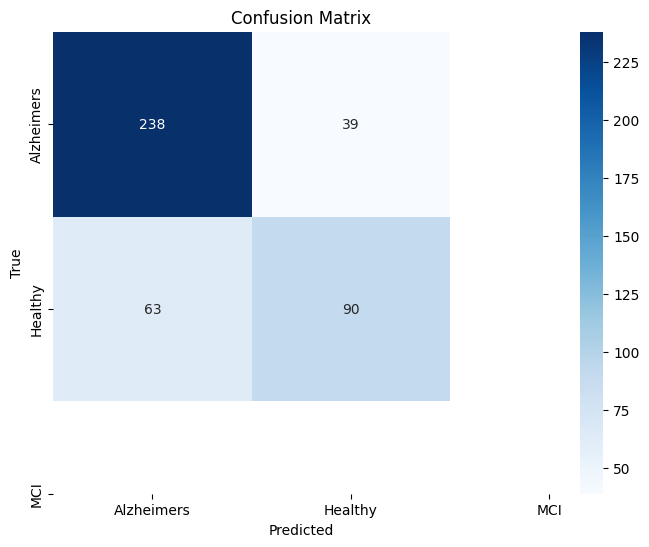

In [15]:
data['Diagnosis'] = data['Diagnosis'].astype('category').cat.codes

# Separate features and target variable
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Standardize the features
X = (X - X.mean()) / X.std()

# Apply PCA
pca = PCA(n_components=10)  # You can choose the number of components
X_pca = pca.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and train the SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Apply k-fold cross-validation
k = 10  # Number of folds
cross_val_scores = cross_val_score(model, X_pca, y, cv=k)

print(f"Accuracy on test set: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print(f"Cross-validation accuracy scores: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {cross_val_scores.mean():.2f}")
print(f"Standard deviation of cross-validation accuracy: {cross_val_scores.std():.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Alzheimers', 'Healthy', 'MCI'], yticklabels=['Alzheimers', 'Healthy', 'MCI'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Standardize the features
X = (X - X.mean()) / X.std()

# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_pca)

# Evaluation
ari_kmeans = adjusted_rand_score(y, kmeans_labels)
silhouette_kmeans = silhouette_score(X_pca, kmeans_labels)

ari_hierarchical = adjusted_rand_score(y, hierarchical_labels)
silhouette_hierarchical = silhouette_score(X_pca, hierarchical_labels)

print(f"K-means ARI: {ari_kmeans:.2f}")
print(f"K-means Silhouette Score: {silhouette_kmeans:.2f}")
print(f"Hierarchical ARI: {ari_hierarchical:.2f}")
print(f"Hierarchical Silhouette Score: {silhouette_hierarchical:.2f}")

K-means ARI: 0.00
K-means Silhouette Score: 0.07
Hierarchical ARI: -0.00
Hierarchical Silhouette Score: 0.05


Random Forest Classifier
Accuracy on test set: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80       277
           1       0.65      0.41      0.50       153

    accuracy                           0.71       430
   macro avg       0.69      0.64      0.65       430
weighted avg       0.70      0.71      0.69       430

Confusion Matrix:
 [[243  34]
 [ 90  63]]
Cross-validation accuracy scores: [0.71627907 0.73023256 0.6744186  0.69767442 0.68372093 0.69767442
 0.72093023 0.73953488 0.68372093 0.62616822]
Mean cross-validation accuracy: 0.70
Standard deviation of cross-validation accuracy: 0.03

Decision Tree Classifier
Accuracy on test set: 0.60
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       277
           1       0.45      0.45      0.45       153

    accuracy                           0.60       430
   macro avg       0.5

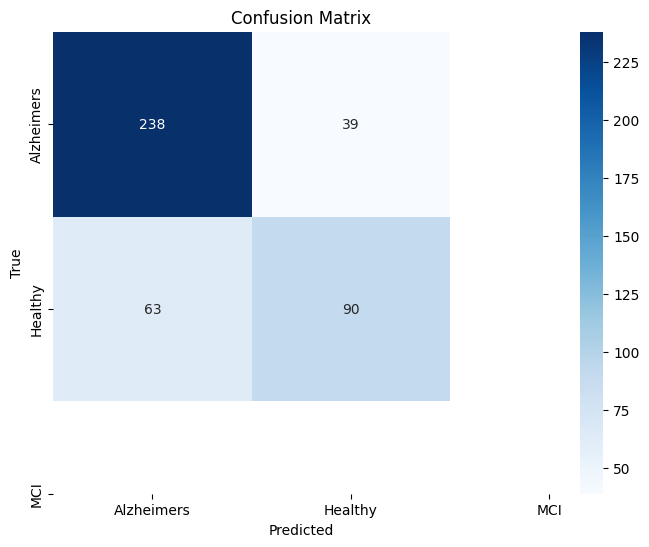

In [17]:
# Separate features and target variable
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Standardize the features
X = (X - X.mean()) / X.std()

# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_cross_val_scores = cross_val_score(rf_model, X_pca, y, cv=10)

print("Random Forest Classifier")
print(f"Accuracy on test set: {rf_accuracy:.2f}")
print("Classification Report:\n", rf_report)
print("Confusion Matrix:\n", rf_conf_matrix)
print(f"Cross-validation accuracy scores: {rf_cross_val_scores}")
print(f"Mean cross-validation accuracy: {rf_cross_val_scores.mean():.2f}")
print(f"Standard deviation of cross-validation accuracy: {rf_cross_val_scores.std():.2f}")

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Evaluate Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_cross_val_scores = cross_val_score(dt_model, X_pca, y, cv=10)

print("\nDecision Tree Classifier")
print(f"Accuracy on test set: {dt_accuracy:.2f}")
print("Classification Report:\n", dt_report)
print("Confusion Matrix:\n", dt_conf_matrix)
print(f"Cross-validation accuracy scores: {dt_cross_val_scores}")
print(f"Mean cross-validation accuracy: {dt_cross_val_scores.mean():.2f}")
print(f"Standard deviation of cross-validation accuracy: {dt_cross_val_scores.std():.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Alzheimers', 'Healthy', 'MCI'], yticklabels=['Alzheimers', 'Healthy', 'MCI'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/100


c:\Users\devan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5933 - loss: 0.6446 - val_accuracy: 0.7442 - val_loss: 0.5388
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7540 - loss: 0.5230 - val_accuracy: 0.7558 - val_loss: 0.5205
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7595 - loss: 0.5101 - val_accuracy: 0.7465 - val_loss: 0.5217
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7698 - loss: 0.4926 - val_accuracy: 0.7535 - val_loss: 0.5209
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7631 - loss: 0.4928 - val_accuracy: 0.7442 - val_loss: 0.5227
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7644 - loss: 0.4720 - val_accuracy: 0.7512 - val_loss: 0.5221
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7861 - loss: 0.4473 - val_accuracy: 0.7581 - val_loss: 0.5211
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7820 - loss: 0.4479 - val_accuracy: 0.7558 - val_loss: 0.5

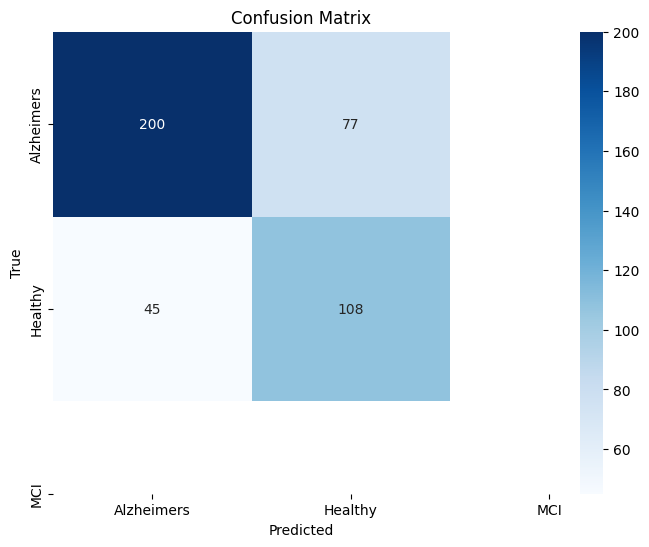

In [18]:
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Convert target variable to categorical
y_categorical = to_categorical(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_categorical, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_true_classes = y_test.argmax(axis=1)

accuracy = accuracy_score(y_test_true_classes, y_test_pred_classes)
report = classification_report(y_test_true_classes, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)

print("Artificial Neural Network")
print(f"Accuracy on test set: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Alzheimers', 'Healthy', 'MCI'], yticklabels=['Alzheimers', 'Healthy', 'MCI'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()